In [93]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [94]:
df_eda = pd.read_csv('df_recomendador_limpio.csv')
print(df_eda.shape)
df_eda.head()

(99639, 18)


,make,model,version,fuel,year,kms,power,shift,price,dealer_name,dealer_address,dealer_city,dealer_zip_code,province,vehicle_age,price_per_power,price_per_year,dealer_info
0,Opel,Crossland,1.2 GAS 110 GS Line 5p S/S,Gasolina,2022,5.0,110.0,manual,22900,Sergio Y.,"2, Carrer de Jacint Benavente, Poblenou, Pined...",Pineda de Mar,8397,Barcelona,3,208.19,7633.34,"Sergio Y.\n2, Carrer de Jacint Benavente, Pobl..."
1,Opel,Crossland,1.2 81kW (110CV) GS Line,Gasolina,2022,24847.0,110.0,manual,19990,Peugeot Alcala 534,"Avenida de José Gárate, Coslada, Área metropol...",Coslada,28823,Madrid,3,181.73,6663.34,"Peugeot Alcala 534\nAvenida de José Gárate, Co..."
2,Opel,Crossland,1.5D 88kW (120CV) Business Elegance Auto,Diésel,2021,41356.0,120.0,automatic,18590,Clicars S.,"San Cristóbal, Avenida de Andalucía, San Crist...",Madrid,28021,Madrid,4,154.92,4647.50,"Clicars S.\nSan Cristóbal, Avenida de Andalucí..."
3,Opel,Crossland,GS-Line 1.2 GAS MT6 S/S 110cv,Gasolina,2022,11.0,110.0,manual,22700,Vallescar S.,"Parc de Bombers de Sabadell, 52, Carretera de ...",Sabadell,8200,Barcelona,3,206.37,7566.67,"Vallescar S.\nParc de Bombers de Sabadell, 52,..."
4,Opel,Crossland,GS-Line 1.2 GAS MT6 S/S 110cv,Gasolina,2022,11.0,110.0,manual,22700,Vallescar Ocasion M.,"27, Carrer de Fèlix Ferran, Mollet del Vallès,...",Mollet del Vallès,8100,Barcelona,3,206.37,7566.67,"Vallescar Ocasion M.\n27, Carrer de Fèlix Ferr..."


In [95]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99639 entries, 0 to 99638
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             99639 non-null  object 
 1   model            99639 non-null  object 
 2   version          99639 non-null  object 
 3   fuel             99639 non-null  object 
 4   year             99639 non-null  int64  
 5   kms              99639 non-null  float64
 6   power            99639 non-null  float64
 7   shift            99639 non-null  object 
 8   price            99639 non-null  int64  
 9   dealer_name      99639 non-null  object 
 10  dealer_address   99639 non-null  object 
 11  dealer_city      99639 non-null  object 
 12  dealer_zip_code  99639 non-null  int64  
 13  province         99639 non-null  object 
 14  vehicle_age      99639 non-null  int64  
 15  price_per_power  99639 non-null  float64
 16  price_per_year   99639 non-null  float64
 17  dealer_info 

In [96]:
df_eda = df_eda[df_eda['shift'] != 'Unknown']
print(df_eda['shift'].value_counts())

shift
manual       60226
automatic    39325
Name: count, dtype: int64


In [97]:
df_eda = df_eda[df_eda['fuel'] != 'Otros']
print(df_eda['fuel'].value_counts())

fuel
Diésel       56039
Gasolina     35784
Eléctrico     6925
Name: count, dtype: int64


In [98]:
# Se crea una nueva variable para el ratio de potencia por kilometraje
df_eda['power_per_kms'] = df_eda['power'] / df_eda['kms'].replace(0,1)
df_eda.head()

,make,model,version,fuel,year,kms,power,shift,price,dealer_name,dealer_address,dealer_city,dealer_zip_code,province,vehicle_age,price_per_power,price_per_year,dealer_info,power_per_kms
0,Opel,Crossland,1.2 GAS 110 GS Line 5p S/S,Gasolina,2022,5.0,110.0,manual,22900,Sergio Y.,"2, Carrer de Jacint Benavente, Poblenou, Pined...",Pineda de Mar,8397,Barcelona,3,208.19,7633.34,"Sergio Y.\n2, Carrer de Jacint Benavente, Pobl...",22.000000
1,Opel,Crossland,1.2 81kW (110CV) GS Line,Gasolina,2022,24847.0,110.0,manual,19990,Peugeot Alcala 534,"Avenida de José Gárate, Coslada, Área metropol...",Coslada,28823,Madrid,3,181.73,6663.34,"Peugeot Alcala 534\nAvenida de José Gárate, Co...",0.004427
2,Opel,Crossland,1.5D 88kW (120CV) Business Elegance Auto,Diésel,2021,41356.0,120.0,automatic,18590,Clicars S.,"San Cristóbal, Avenida de Andalucía, San Crist...",Madrid,28021,Madrid,4,154.92,4647.50,"Clicars S.\nSan Cristóbal, Avenida de Andalucí...",0.002902
3,Opel,Crossland,GS-Line 1.2 GAS MT6 S/S 110cv,Gasolina,2022,11.0,110.0,manual,22700,Vallescar S.,"Parc de Bombers de Sabadell, 52, Carretera de ...",Sabadell,8200,Barcelona,3,206.37,7566.67,"Vallescar S.\nParc de Bombers de Sabadell, 52,...",10.000000
4,Opel,Crossland,GS-Line 1.2 GAS MT6 S/S 110cv,Gasolina,2022,11.0,110.0,manual,22700,Vallescar Ocasion M.,"27, Carrer de Fèlix Ferran, Mollet del Vallès,...",Mollet del Vallès,8100,Barcelona,3,206.37,7566.67,"Vallescar Ocasion M.\n27, Carrer de Fèlix Ferr...",10.000000


In [99]:
# Se revisa la popularidad de la marca y el modelo 
df_eda['make_popularity'] = df_eda.groupby('make')['make'].transform('count')
df_eda['model_popularity'] = df_eda.groupby('model')['model'].transform('count')
df_eda.head()

,make,model,version,fuel,year,kms,power,shift,price,dealer_name,...,dealer_city,dealer_zip_code,province,vehicle_age,price_per_power,price_per_year,dealer_info,power_per_kms,make_popularity,model_popularity
0,Opel,Crossland,1.2 GAS 110 GS Line 5p S/S,Gasolina,2022,5.0,110.0,manual,22900,Sergio Y.,...,Pineda de Mar,8397,Barcelona,3,208.19,7633.34,"Sergio Y.\n2, Carrer de Jacint Benavente, Pobl...",22.000000,4591,158
1,Opel,Crossland,1.2 81kW (110CV) GS Line,Gasolina,2022,24847.0,110.0,manual,19990,Peugeot Alcala 534,...,Coslada,28823,Madrid,3,181.73,6663.34,"Peugeot Alcala 534\nAvenida de José Gárate, Co...",0.004427,4591,158
2,Opel,Crossland,1.5D 88kW (120CV) Business Elegance Auto,Diésel,2021,41356.0,120.0,automatic,18590,Clicars S.,...,Madrid,28021,Madrid,4,154.92,4647.50,"Clicars S.\nSan Cristóbal, Avenida de Andalucí...",0.002902,4591,158
3,Opel,Crossland,GS-Line 1.2 GAS MT6 S/S 110cv,Gasolina,2022,11.0,110.0,manual,22700,Vallescar S.,...,Sabadell,8200,Barcelona,3,206.37,7566.67,"Vallescar S.\nParc de Bombers de Sabadell, 52,...",10.000000,4591,158
4,Opel,Crossland,GS-Line 1.2 GAS MT6 S/S 110cv,Gasolina,2022,11.0,110.0,manual,22700,Vallescar Ocasion M.,...,Mollet del Vallès,8100,Barcelona,3,206.37,7566.67,"Vallescar Ocasion M.\n27, Carrer de Fèlix Ferr...",10.000000,4591,158


In [100]:
# Se revisa si las grandes ciudades influyen en el precio 
big_cities = ['Madrid', 'Barcelona', 'Valencia', 'Sevilla', 'Bilbao', 'Zaragoza']
df_eda['big_city_dealer'] = df_eda['dealer_city'].apply(lambda x: 1 if x in big_cities else 0)
df_eda.head()

,make,model,version,fuel,year,kms,power,shift,price,dealer_name,...,dealer_zip_code,province,vehicle_age,price_per_power,price_per_year,dealer_info,power_per_kms,make_popularity,model_popularity,big_city_dealer
0,Opel,Crossland,1.2 GAS 110 GS Line 5p S/S,Gasolina,2022,5.0,110.0,manual,22900,Sergio Y.,...,8397,Barcelona,3,208.19,7633.34,"Sergio Y.\n2, Carrer de Jacint Benavente, Pobl...",22.000000,4591,158,0
1,Opel,Crossland,1.2 81kW (110CV) GS Line,Gasolina,2022,24847.0,110.0,manual,19990,Peugeot Alcala 534,...,28823,Madrid,3,181.73,6663.34,"Peugeot Alcala 534\nAvenida de José Gárate, Co...",0.004427,4591,158,0
2,Opel,Crossland,1.5D 88kW (120CV) Business Elegance Auto,Diésel,2021,41356.0,120.0,automatic,18590,Clicars S.,...,28021,Madrid,4,154.92,4647.50,"Clicars S.\nSan Cristóbal, Avenida de Andalucí...",0.002902,4591,158,1
3,Opel,Crossland,GS-Line 1.2 GAS MT6 S/S 110cv,Gasolina,2022,11.0,110.0,manual,22700,Vallescar S.,...,8200,Barcelona,3,206.37,7566.67,"Vallescar S.\nParc de Bombers de Sabadell, 52,...",10.000000,4591,158,0
4,Opel,Crossland,GS-Line 1.2 GAS MT6 S/S 110cv,Gasolina,2022,11.0,110.0,manual,22700,Vallescar Ocasion M.,...,8100,Barcelona,3,206.37,7566.67,"Vallescar Ocasion M.\n27, Carrer de Fèlix Ferr...",10.000000,4591,158,0


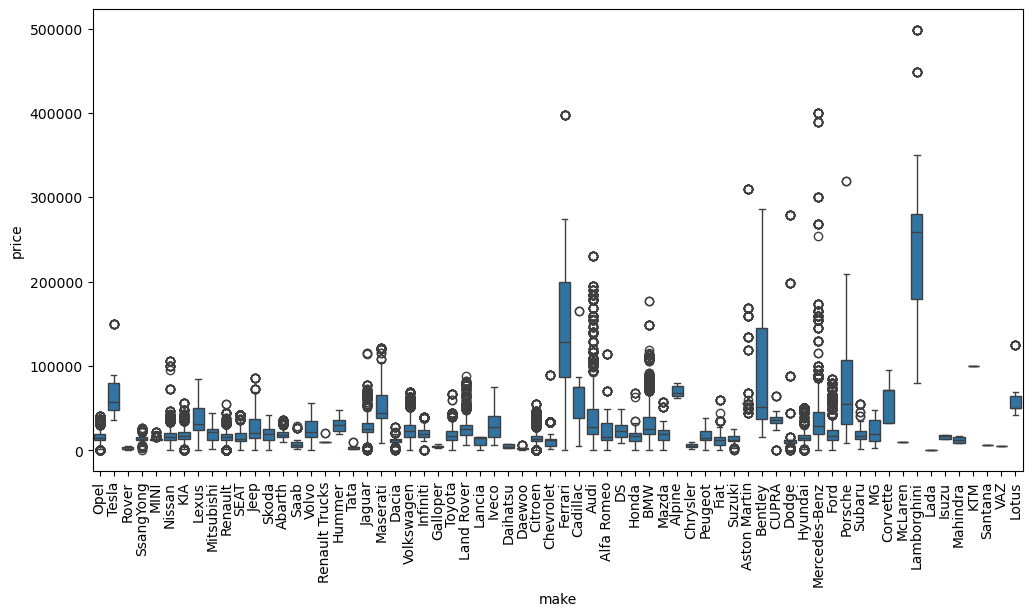

In [101]:
# Se revisa si hay relación directa entre el precio y las variables categóricas 
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_eda, x='make', y='price')
plt.xticks(rotation=90)
plt.show()

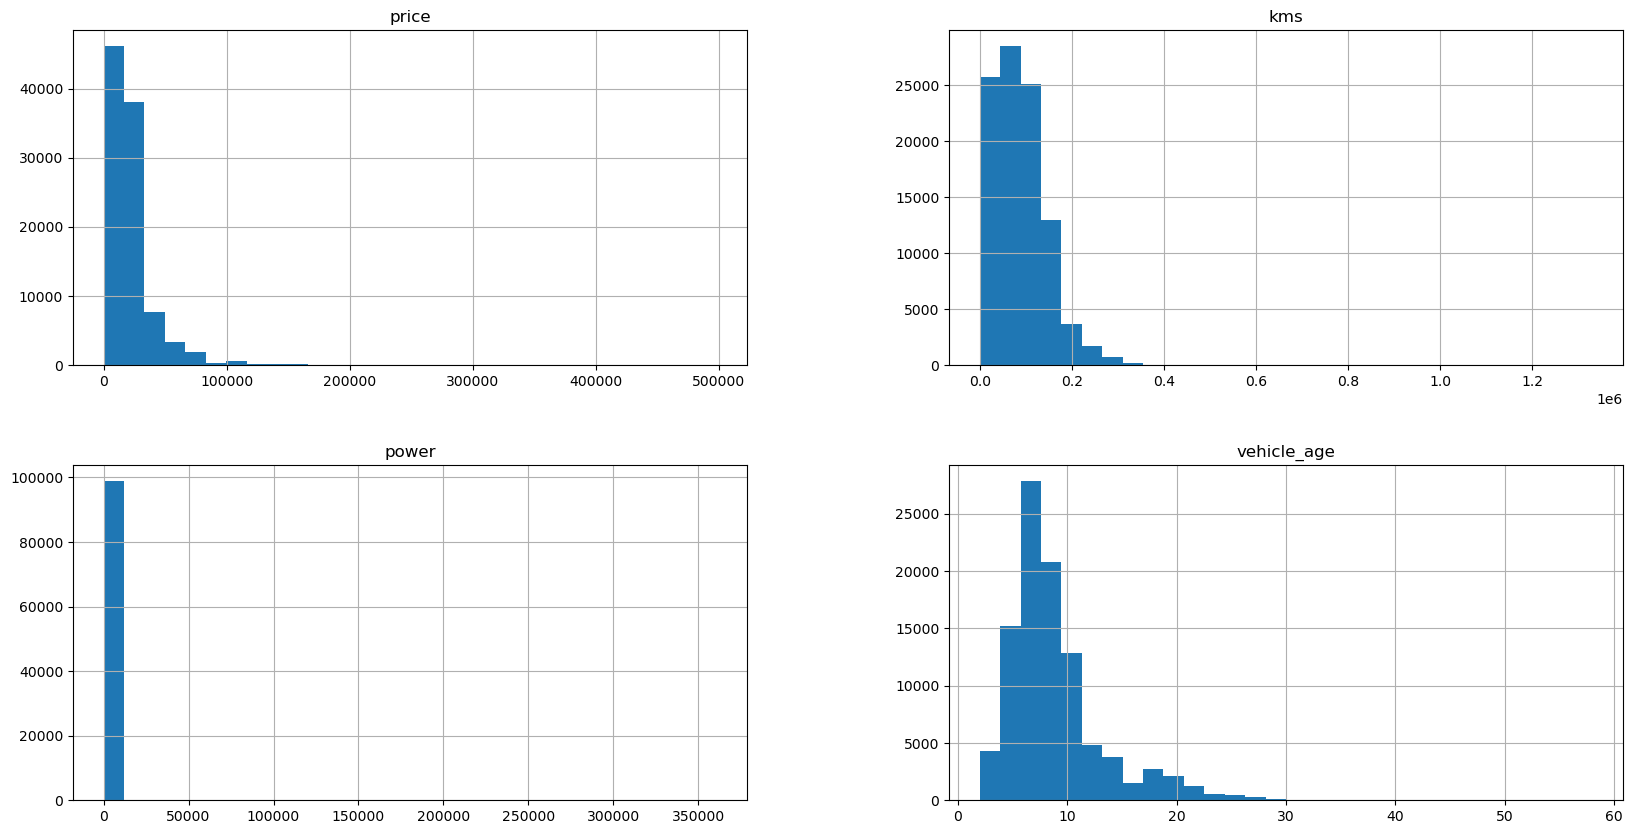

In [102]:
# Visualizar distribuciones
df_eda [['price', 'kms', 'power', 'vehicle_age']].hist(bins=30, figsize=(20,10))
plt.show()

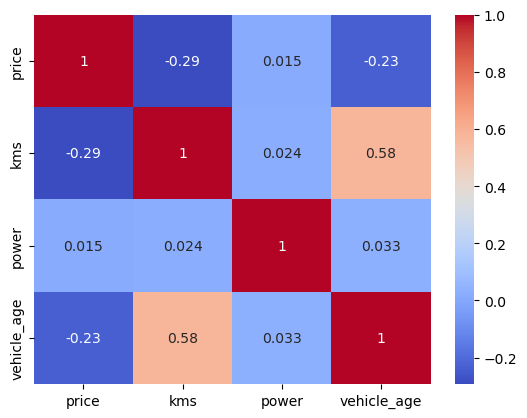

In [103]:
# Se analiza la correlación entre las variables numéricas 
sns.heatmap(df_eda[['price', 'kms', 'power', 'vehicle_age']].corr(), annot=True, cmap='coolwarm')
plt.show()


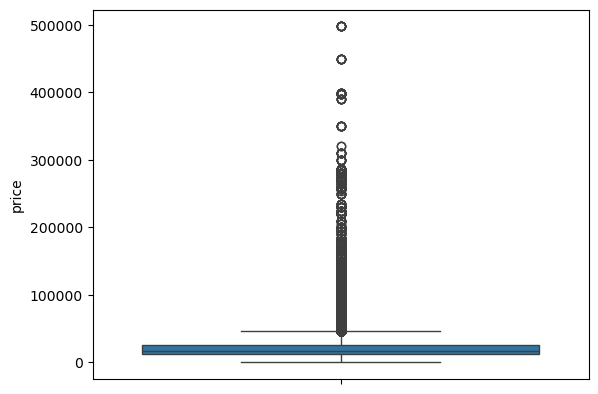

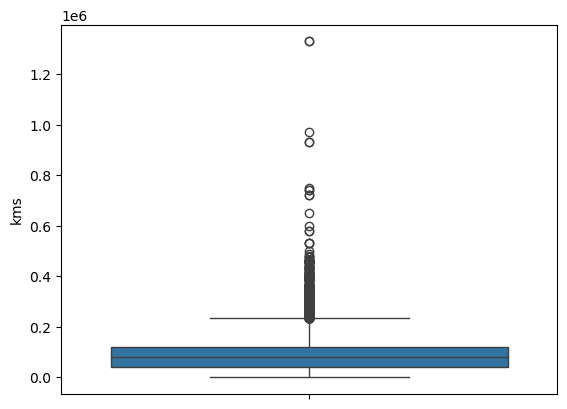

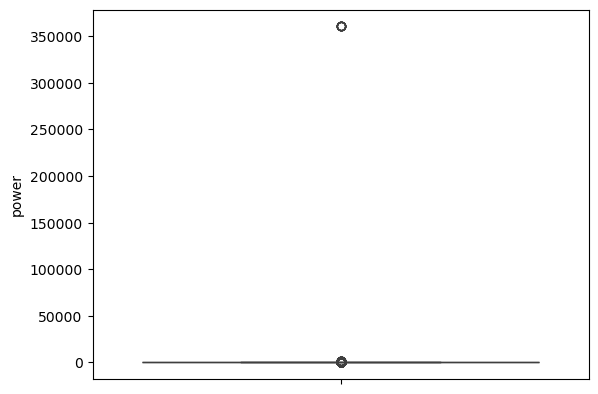

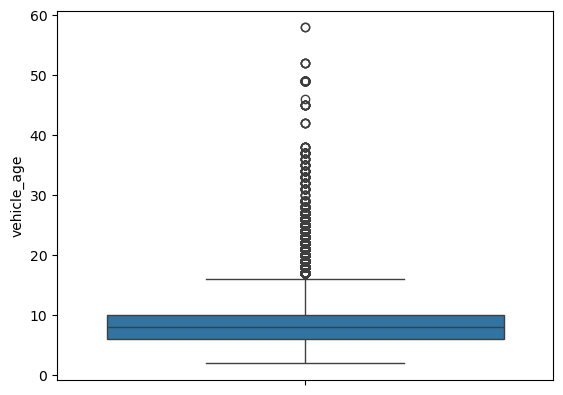

In [104]:
# Se revisan los outliers
sns.boxplot(df_eda['price'])
plt.show()

sns.boxplot(df_eda['kms'])
plt.show()

sns.boxplot(df_eda['power'])
plt.show()

sns.boxplot(df_eda['vehicle_age'])
plt.show()


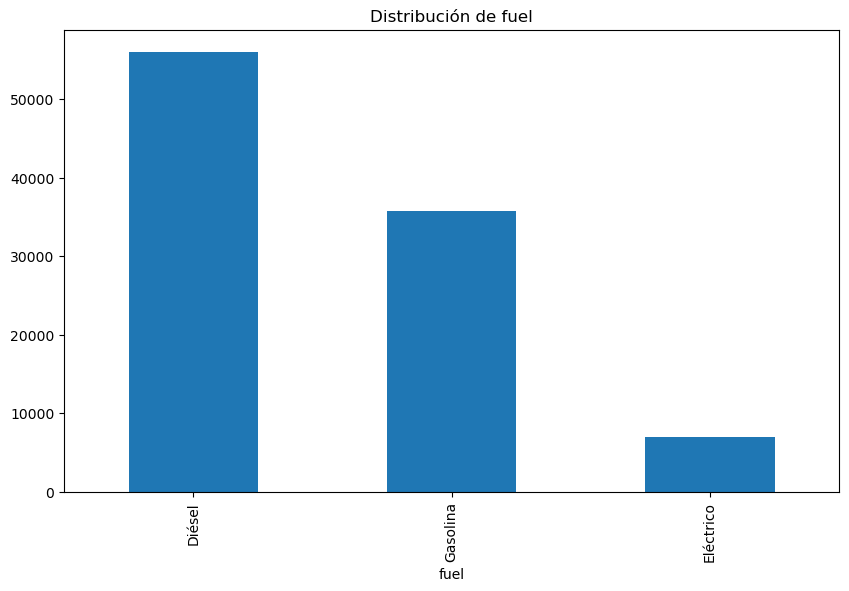

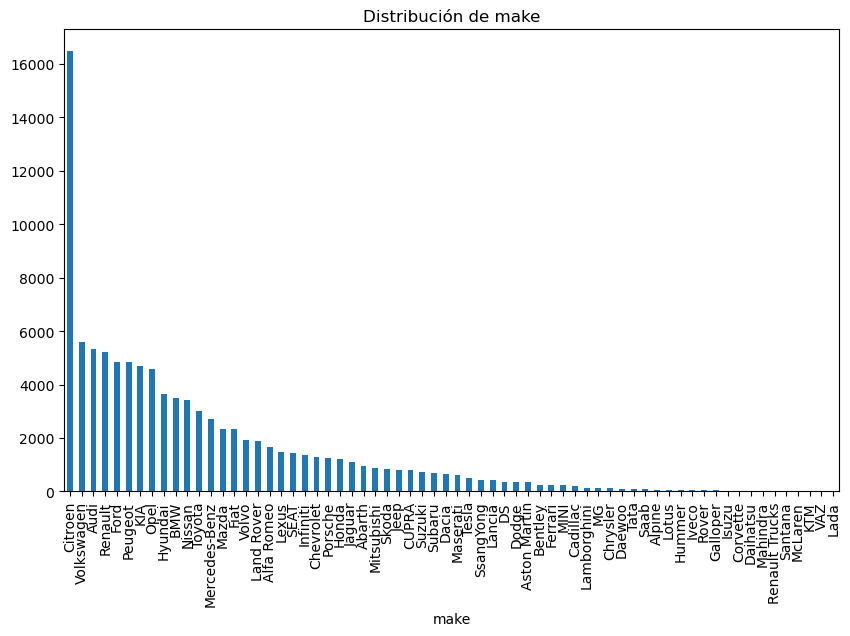

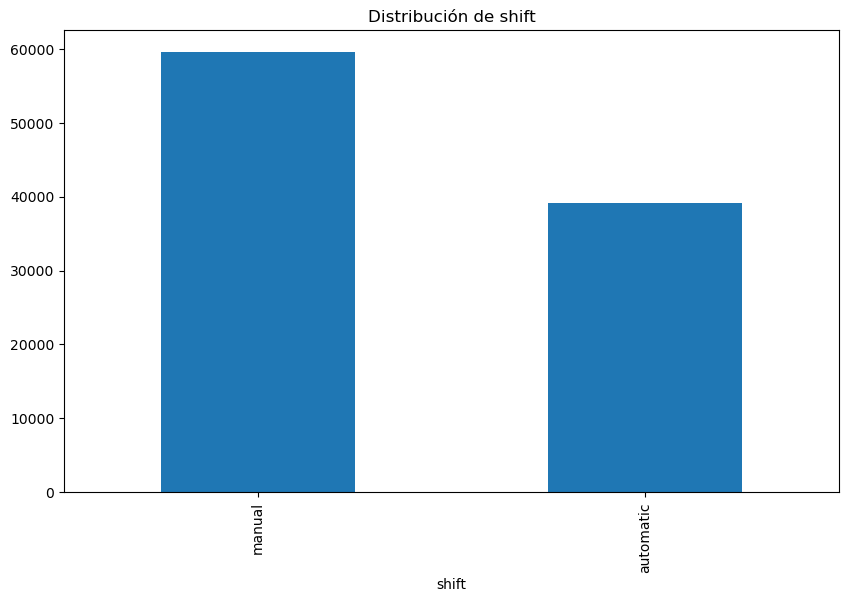

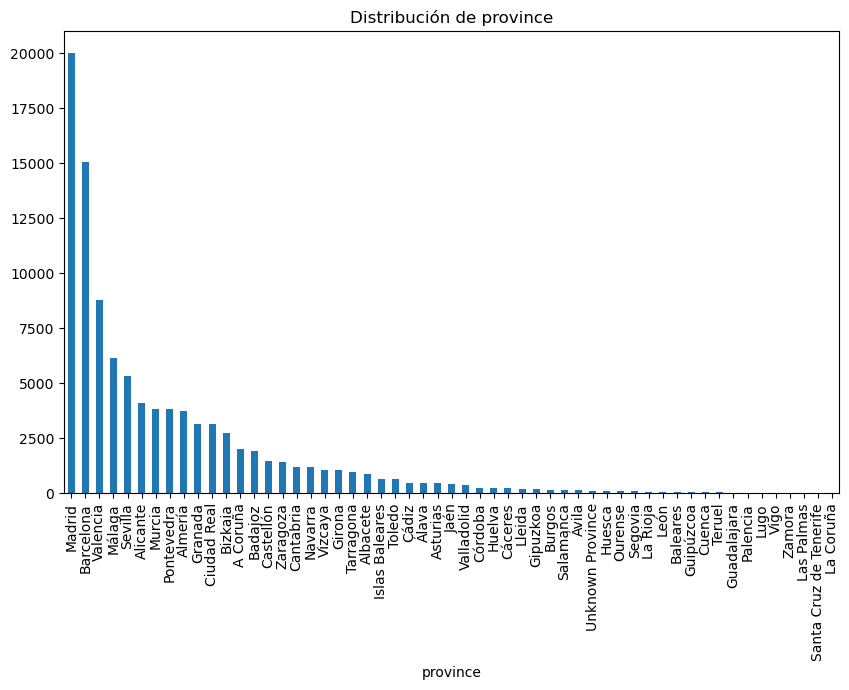

In [105]:
# Crear gráficos de barras para todas las variables categóricas
categoriales = ['fuel', 'make', 'shift', 'province']

for col in categoriales:
    plt.figure(figsize=(10, 6))
    df_eda[col].value_counts().plot(kind='bar')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('')
    plt.show()

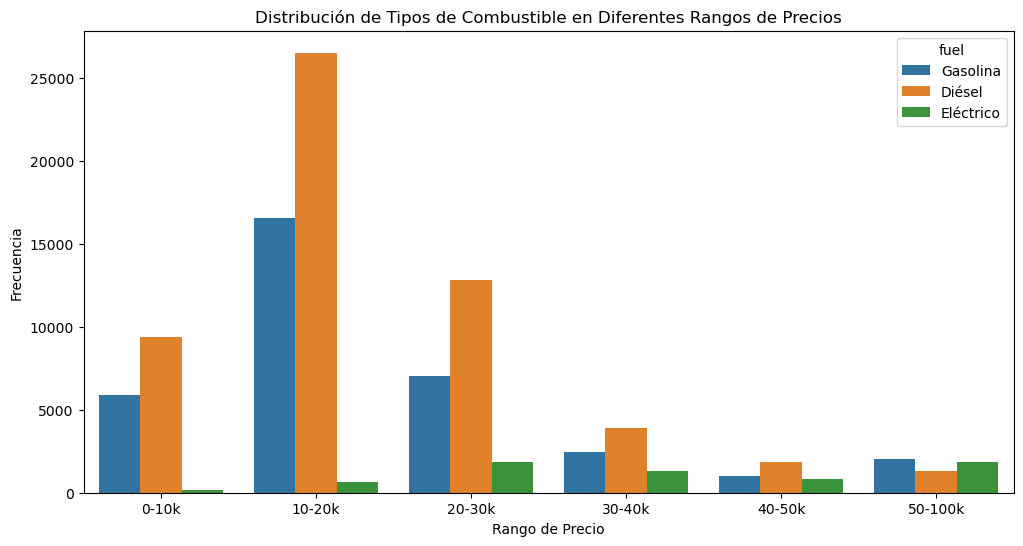

In [106]:
# Distribución de fuel en diferentes rangos de precios
df_eda['price_range'] = pd.cut(df_eda['price'], bins=[0, 10000, 20000, 30000, 40000, 50000, 100000], labels=['0-10k', '10-20k', '20-30k', '30-40k', '40-50k', '50-100k'])

plt.figure(figsize=(12, 6))
sns.countplot(x='price_range', hue='fuel', data=df_eda)
plt.title('Distribución de Tipos de Combustible en Diferentes Rangos de Precios')
plt.xlabel('Rango de Precio')
plt.ylabel('Frecuencia')
plt.show()

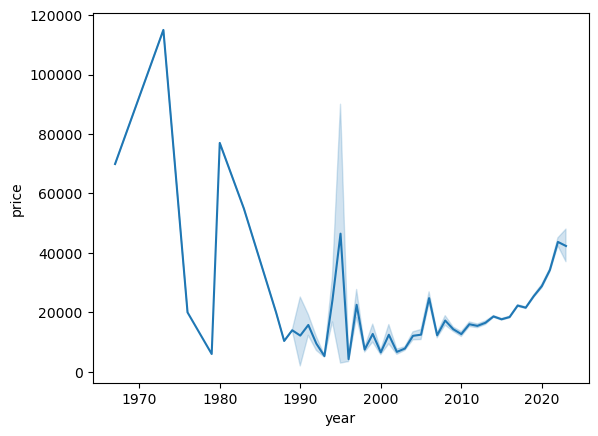

In [107]:
# Se revisa la distribución de precios por año
sns.lineplot(data=df_eda, x='year', y='price')
plt.show()

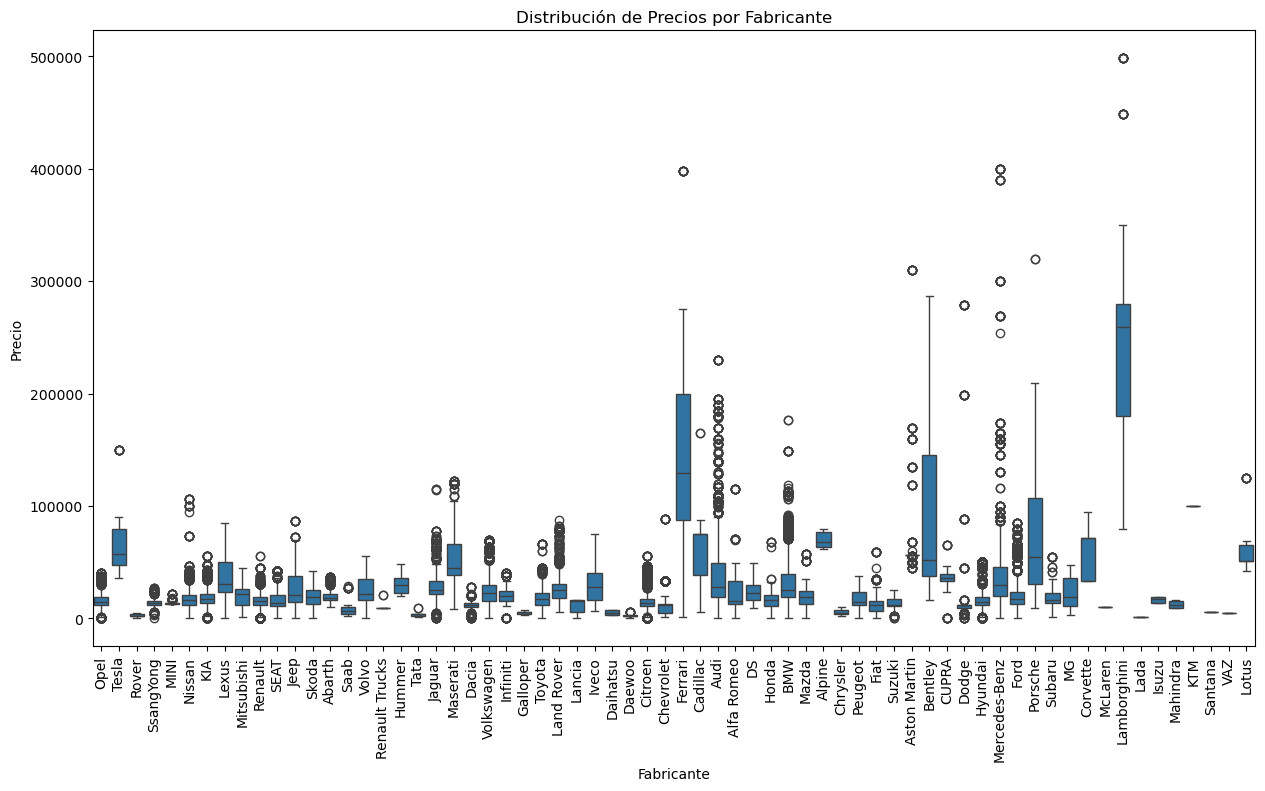

In [108]:
# Se revisa la distribución de precios por modelo
plt.figure(figsize=(15, 8))
sns.boxplot(x='make', y='price', data=df_eda)
plt.title('Distribución de Precios por Fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Precio')
plt.xticks(rotation=90)
plt.show()


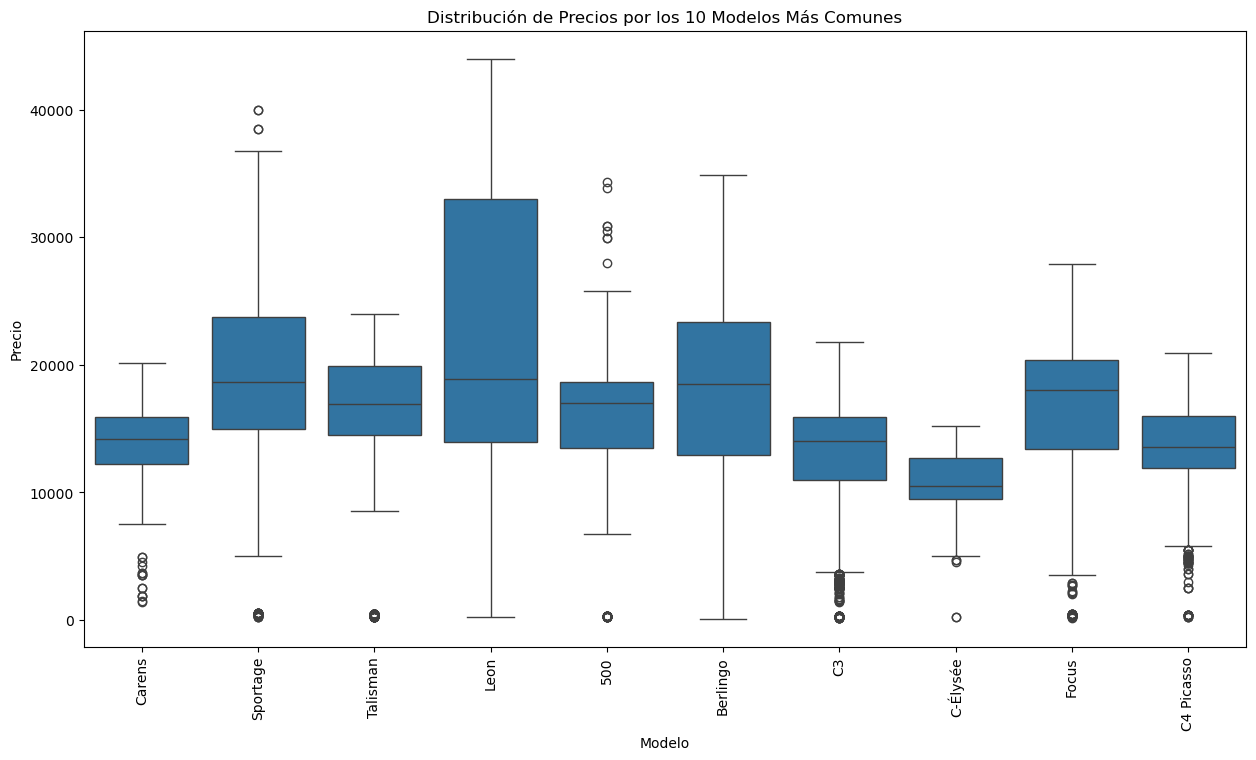

In [109]:
# Filtrar para mostrar solo los modelos más comunes
modelos_comunes = df_eda['model'].value_counts().nlargest(10).index  # 10 modelos más comunes
df_modelos_comunes = df_eda[df_eda['model'].isin(modelos_comunes)]

plt.figure(figsize=(15, 8))
sns.boxplot(x='model', y='price', data=df_modelos_comunes)
plt.title('Distribución de Precios por los 10 Modelos Más Comunes')
plt.xlabel('Modelo')
plt.ylabel('Precio')
plt.xticks(rotation=90)
plt.show()

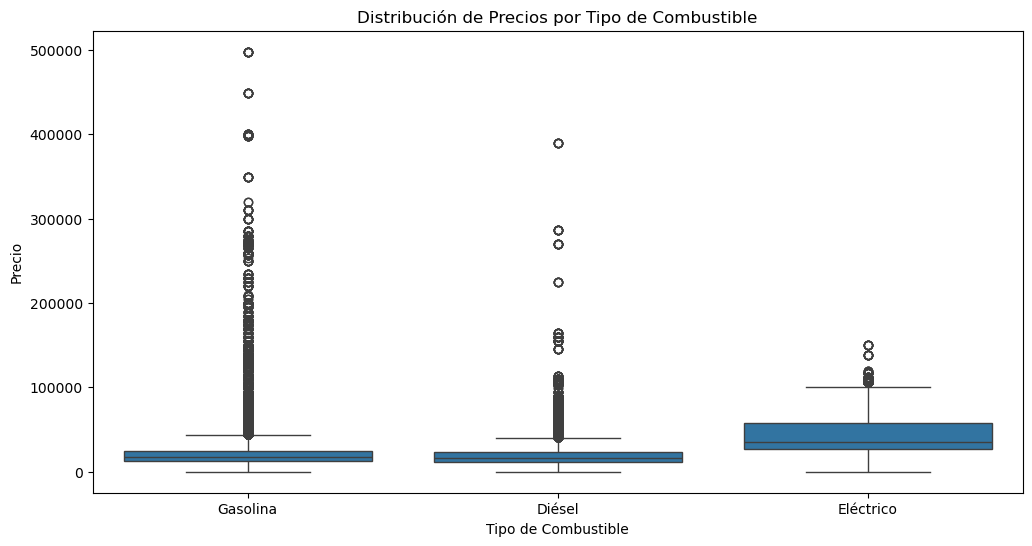

In [110]:
# Se revisa la distribución de precios por combustible
plt.figure(figsize=(12, 6))
sns.boxplot(x='fuel', y='price', data=df_eda)
plt.title('Distribución de Precios por Tipo de Combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Precio')
plt.show()

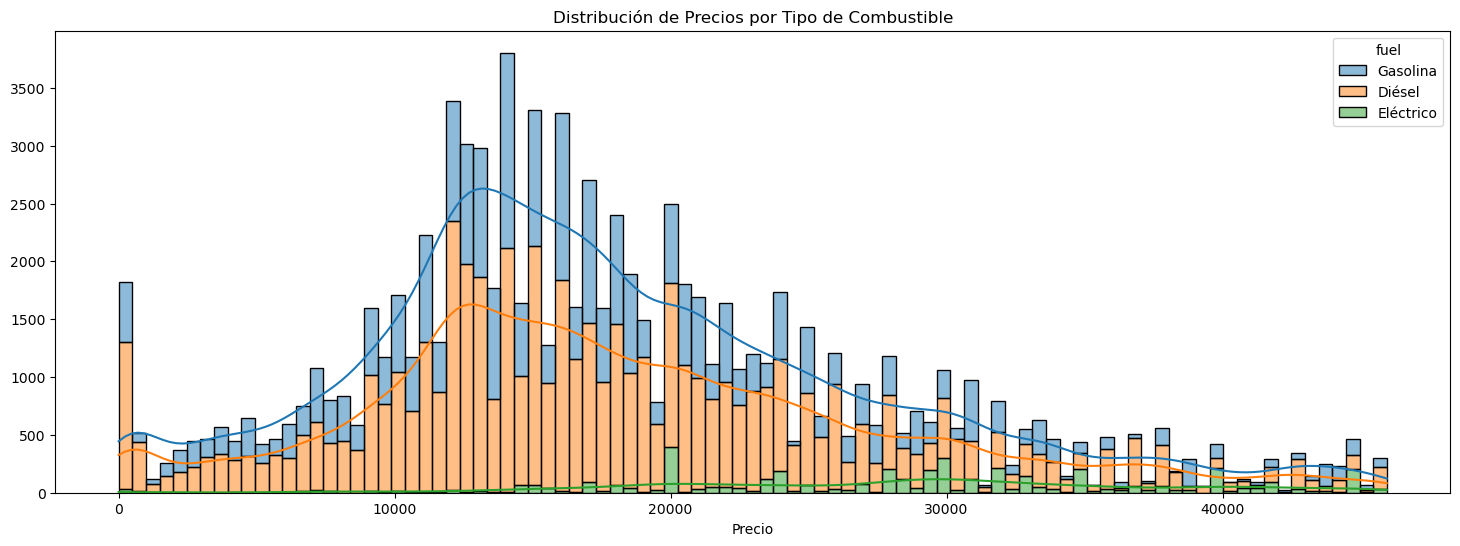

In [114]:
# Crear un histograma para revisar la distribución de precios por combustible
plt.figure(figsize=(18, 6))
sns.histplot(data=df_eda, x='price', hue='fuel', multiple='stack', kde=True)
plt.title('Distribución de Precios por Tipo de Combustible')
plt.xlabel('Precio')
plt.ylabel('')
plt.show()

12478.0
25875.0
13397.0


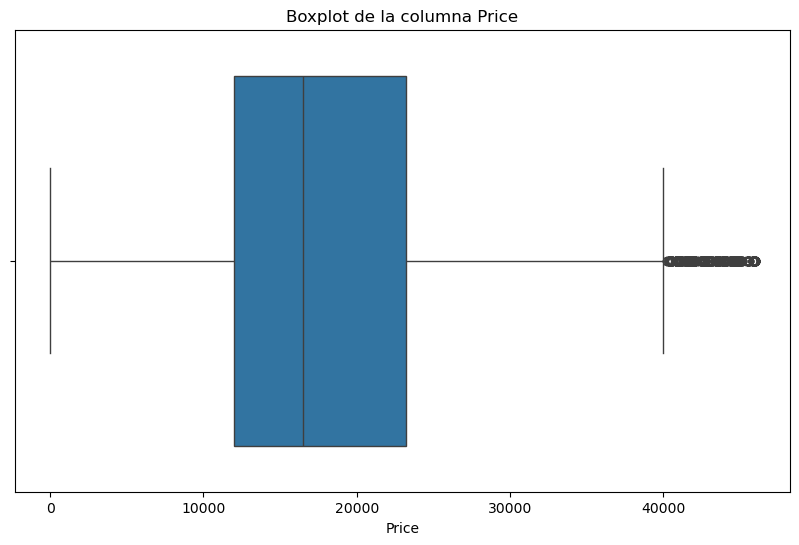

In [112]:
# Detección de outliers 
Q1 = df_eda['price'].quantile(0.25)  
Q3 = df_eda['price'].quantile(0.75) 
IQR = Q3 - Q1  

# Filtrar outliers
df_eda = df_eda[(df_eda['price'] >= Q1 - 1.5 * IQR) & (df_eda['price'] <= Q3 + 1.5 * IQR)]

# Imprimir cuartiles y IQR
print(Q1)
print(Q3)
print(IQR)

# Crear el boxplot para visualizar los valores atípicos en la columna price
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_eda['price'])
plt.title('Boxplot de la columna Price')
plt.xlabel('Price')
plt.show()

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcula el VIF para cada variable numérica
numeric_df = df_eda.select_dtypes(include=['float64', 'int64'])
vif = pd.DataFrame()
vif['Variable'] = numeric_df.columns
vif['VIF'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
print(vif.sort_values(by='VIF', ascending=False))

            Variable        VIF
0               year  34.795960
5        vehicle_age  10.379253
7     price_per_year   4.439964
3              price   3.339520
6    price_per_power   2.492768
9    make_popularity   1.937713
10  model_popularity   1.916675
1                kms   1.718133
8      power_per_kms   1.147468
11   big_city_dealer   1.131200
4    dealer_zip_code   1.088779
2              power   1.002285
